In [ ]:
#!pip install git+https://github.com/abey79/vsketch#egg=vsketch
!pip install -e "git+https://github.com/marceloprates/prettymaps#egg=prettymaps"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining prettymaps from git+https://github.com/marceloprates/prettymaps#egg=prettymaps
  Updating ./src/prettymaps clone
  Running command git fetch -q --tags
  Running command git reset --hard -q f03d71f7da1c0341bdebb5a08d8c8428c3b38027
  Attempting uninstall: prettymaps
    Found existing installation: prettymaps 0.1.3
    Can't uninstall 'prettymaps'. No files were found to uninstall.
  Running setup.py develop for prettymaps


In [ ]:
!wget -O PermanentMarker-Regular.ttf https://github.com/marceloprates/prettymaps/raw/main/assets/Permanent_Marker/PermanentMarker-Regular.ttf

--2022-11-15 14:57:51--  https://github.com/marceloprates/prettymaps/raw/main/assets/Permanent_Marker/PermanentMarker-Regular.ttf
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-11-15 14:57:52 ERROR 404: Not Found.



Przykład 1. - podstawowy

/content/src/prettymaps/prettymaps/draw.py:975: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  left=0, bottom=0, right=1, top=1, wspace=0, hspace=0


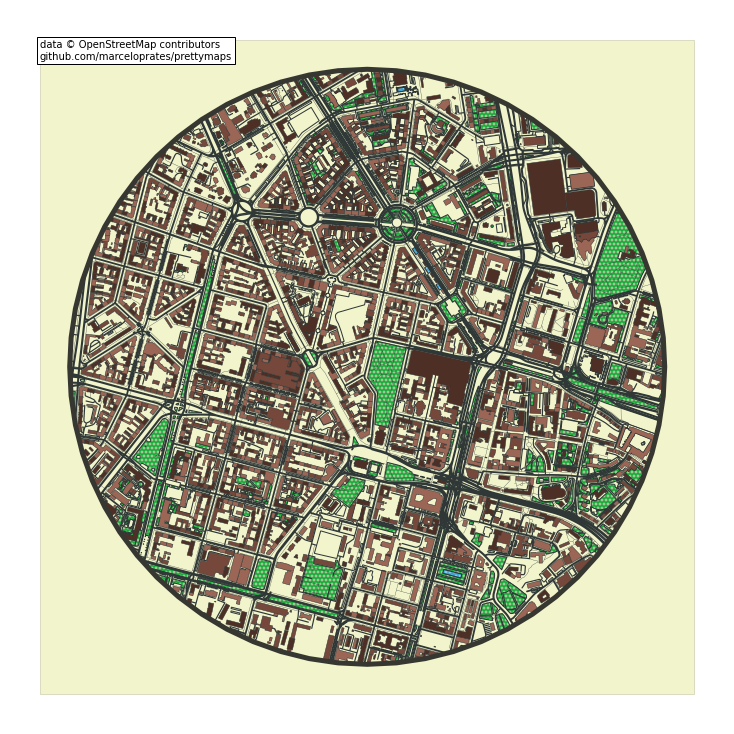

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from prettymaps import plot

# zdefiniowanie przestrzeni mapy
fig, ax = plt.subplots(figsize = (10, 10), constrained_layout = True)
# MAPA
layers = plot(
    # Adres:
    #'Plac Grunwaldzki, Szczecin, Polska',
    # współrzędne geograficzne
    (53.428433469351, 14.54659327488271),
    # promień okręgu/kwadratu w którym tworzymy mapę
    radius = 1000,
    # 
    circle = True,
    # Matplotlib axis
    ax = ax,
    # wybór warstw OpenStreetMap
    layers = {
            # obrys kształtu mapy
            'perimeter': {},
            # ulice i ich szerokości
            'streets': {
                'width': {
                    'motorway': 5,
                    'trunk': 5,
                    'primary': 4.5,
                    'secondary': 4,
                    'tertiary': 3.5,
                    'residential': 3,
                    'service': 2,
                    'unclassified': 2,
                    'pedestrian': 1,
                    'footway': .5,
                }
            },
            # Inne warstwy:
            # {'tags': {KEY_OSM: VALUE_OSM}}
            'building': {'tags': {'building': True, 'landuse': 'construction'}, 'union': False},
            'water': {'tags': {'natural': ['water', 'bay']}},
            'green': {'tags': {'landuse': 'grass', 'natural': ['island', 'wood'], 'leisure': 'park'}},
            'forest': {'tags': {'landuse': 'forest'}},
            'parking': {'tags': {'amenity': 'parking', 'highway': 'pedestrian', 'man_made': 'pier'}}
        },
        # parametry stylizacyjne dla każdej warstwy:
        # wpisz nazwę jednej z warstw którą wcześniej zdefiniowałeś, a nastepnie nadaj jej styl
        # fc - facecolor (kolor wypełnienia), ec - edgecolor (kolor obrysu), lw - linewidth (grubość obrysu)
        # alpha - przezroczystość (0-1), zorder - kolejność wyświetlania warstw
        # palette - lista kolorów, które będą losowo przyporządkowane do obiektów z danej warstwy
        style = {
            'background': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'zorder': -1},
            'perimeter': {'fill': False, 'ec': '#373732', 'lw': 5, 'zorder': 5},
            'green': {'fc': '#15ad38', 'ec': '#2f3737', 'lw': 1, 'zorder': 1},
            'forest': {'fc': '#1d8009', 'ec': '#2f3737', 'lw': 1, 'zorder': 1},
            'water': {'fc': '#39a5d7', 'ec': '#2F3737', 'hatch_c': '#85c9e6', 'lw': 1, 'zorder': 2},
            'parking': {'fc': '#F2F4CB', 'ec': '#2F3737', 'lw': 1, 'zorder': 3},
            'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 3},
            'building': {'palette': ['#4d2f26', '#75483b', '#9c6656'], 'ec': '#2F3737', 'lw': .5, 'zorder': 4}
        }
)

plt.savefig('szczecin.png')
plt.show()

Przykład 2. - podstawowy

/content/src/prettymaps/prettymaps/draw.py:975: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  left=0, bottom=0, right=1, top=1, wspace=0, hspace=0


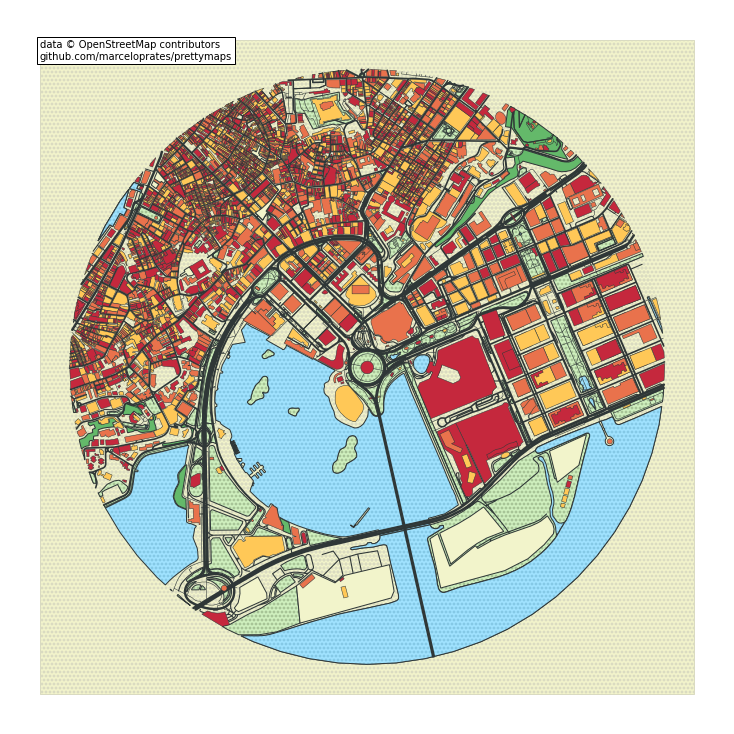

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from prettymaps import plot

fig, ax = plt.subplots(figsize = (10, 10), constrained_layout = True)
layers = plot(
    'Praça Ferreira do Amaral, Macau',
    radius = 1100,
    circle = True,
    ax = ax,
    layers = {
            'perimeter': {},
            'streets': {
                'width': {
                    'motorway': 5,
                    'trunk': 5,
                    'primary': 4.5,
                    'secondary': 4,
                    'tertiary': 3.5,
                    'residential': 3,
                    'service': 2,
                    'unclassified': 2,
                    'pedestrian': 2,
                    'footway': 1,
                }
            },
            'building': {'tags': {'building': True, 'landuse': 'construction'}, 'union': False},
            'water': {'tags': {'natural': ['water', 'bay']}},
            'green': {'tags': {'landuse': 'grass', 'natural': ['island', 'wood'], 'leisure': 'park'}},
            'forest': {'tags': {'landuse': 'forest'}},
            'parking': {'tags': {'amenity': 'parking', 'highway': 'pedestrian', 'man_made': 'pier'}}
        },
        style = {
            'background': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'hatch': 'ooo...', 'zorder': -1},
            'perimeter': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'lw': 0, 'hatch': 'ooo...',  'zorder': 0},
            'green': {'fc': '#D0F1BF', 'ec': '#2F3737', 'lw': 1, 'zorder': 1},
            'forest': {'fc': '#64B96A', 'ec': '#2F3737', 'lw': 1, 'zorder': 1},
            'water': {'fc': '#a1e3ff', 'ec': '#2F3737', 'hatch': 'ooo...', 'hatch_c': '#85c9e6', 'lw': 1, 'zorder': 2},
            'parking': {'fc': '#F2F4CB', 'ec': '#2F3737', 'lw': 1, 'zorder': 3},
            'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 3},
            'building': {'palette': ['#FFC857', '#E9724C', '#C5283D'], 'ec': '#2F3737', 'lw': .5, 'zorder': 4},
        }
)

plt.savefig('macau.png')
plt.show()

Przykład 3. - zaawansowany

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from prettymaps import plot

# funkcja tworząca bofur 10m dla obrysu mapy
def postprocessing(layers):
    layers.geodataframes['perimeter'] = layers.geodataframes['perimeter'].buffer(10)
    return layers

# zdefiniowanie przestrzeni mapy
fig, ax = plt.subplots(figsize = (10, 10), constrained_layout = True)
# MAPA
plot = plot(
    # Adres:
    #'Plac Grunwaldzki, Szczecin, Polska',
    # współrzędne geograficzne
    (53.428433469351, 14.54659327488271),
    # promień okręgu/kwadratu w którym tworzymy mapę
    radius = 1000,
    circle = True,
    # Matplotlib axis
    ax = ax,
    # funkcja dodająca odsuwająca obrys mapy
    #postprocessing = postprocessing,
    # wybór warstw OpenStreetMap
    layers = {
            # obrys kształtu mapy
            'perimeter': {},
            # ulice i ich szerokości
            'streets': {
                # samodzielny wybór typów dróg
                'custom_filter': '["highway"~"motorway|trunk|primary|secondary|tertiary|residential|construction|service|unclassified|pedestrian|footway"]',
                # jeśli chcemy kwadratową mapę - dodać poniższą linię DO KAŻDEJ WARSTWY
                # 'circle': False,
                # zaokrąglone narożniki:
                # 'dilate': 100,
                'width': {
                    'motorway': 5,
                    'trunk': 5,
                    'primary': 4.5,
                    'secondary': 4,
                    'tertiary': 3.5,
                    'residential': 3,
                    'construction': 3,
                    'service': 2,
                    'unclassified': 2,
                    'pedestrian': 1,
                    'footway': .5,
                }
            },
            # Inne warstwy:
            # {'tags': {KEY_OSM: VALUE_OSM}}
            'trams': {'tags': {'railway': ['tram', 'construction']}},
            'building': {'tags': {'building': True, 'landuse': 'construction'}, 'union': False},
            'water': {'tags': {'natural': ['water', 'bay']}},
            'green': {'tags': {'landuse': 'grass', 'natural': ['island', 'wood'], 'leisure': 'park'}},
            'forest': {'tags': {'landuse': 'forest'}},
            'parking': {'tags': {'amenity': 'parking', 'highway': 'pedestrian', 'man_made': 'pier'}}
        },
        # parametry stylizacyjne dla każdej warstwy:
        # wpisz nazwę jednej z warstw którą wcześniej zdefiniowałeś, a nastepnie nadaj jej styl
        # fc - facecolor (kolor wypełnienia), ec - edgecolor (kolor obrysu), lw - linewidth (grubość obrysu)
        # alpha - przezroczystość (0-1), zorder - kolejność wyświetlania warstw
        # palette - lista kolorów, które będą losowo przyporządkowane do obiektów z danej warstwy
        style = {
            'background': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'zorder': -1},
            'perimeter': {'fill': False, 'ec': '#373732', 'lw': 5, 'zorder': 5},
            'green': {'fc': '#15ad38', 'ec': '#2f3737', 'lw': 1, 'zorder': 1},
            'forest': {'fc': '#1d8009', 'ec': '#2f3737', 'lw': 1, 'zorder': 1},
            'water': {'fc': '#39a5d7', 'ec': '#2F3737', 'hatch_c': '#85c9e6', 'lw': 1, 'zorder': 2},
            'parking': {'fc': '#F2F4CB', 'ec': '#2F3737', 'lw': 1, 'zorder': 3},
            'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 3},
            'building': {'palette': ['#4d2f26', '#75483b', '#9c6656'], 'ec': '#2F3737', 'lw': .5, 'zorder': 4},
            'trams': {'fill': False, 'ec': '#ac190b', 'lw': 2, 'zorder': 4}
        }
)

fig.patch.set_facecolor('#F2F4CB')
xmin, ymin, xmax, ymax = plot.geodataframes['perimeter'].bounds.iloc[0]
dx, dy = xmax - xmin, ymax - ymin
#ax.set_xlim(xmin - .06 * dx, xmax + .06 * dx)
#ax.set_ylim(ymin - .06 * dy, ymax + .06 * dy)

ax.text(
    0.1, 0.1,
    'Szczecin, Poland',
    color = '#2F3737',
    rotation = 45,
    size = 50
)
ax.text(
    0.1, 0.1,
    "53° 25' 42\" N, 14° 32' 47\" E",
    color = '#2F3737',
    rotation = 45,
    size = 40
)

plt.savefig('szczecin2.png')
plt.show()

/content/src/prettymaps/prettymaps/draw.py:975: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  left=0, bottom=0, right=1, top=1, wspace=0, hspace=0


ValueError: ignored

<Figure size 720x720 with 1 Axes>

Przykład 4. - zaawansowany

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from prettymaps import plot

# zdefiniowanie przestrzeni mapy
fig, ax = plt.subplots(figsize = (10, 10), constrained_layout = True)
# MAPA
layers = plot(
    # Adres:
    'Stad van de Zon, Heerhugowaard, Netherlands',
    # promień okręgu/kwadratu w którym tworzymy mapę
    radius = 1100,
    # Matplotlib axis
    ax = ax,
    # wybór warstw OpenStreetMap
    layers = {
            'perimeter': { 'circle': False, 'dilate': 100},
            'streets': {
                'width': {
                    'motorway': 5,
                    'trunk': 5,
                    'primary': 4.5,
                    'secondary': 4,
                    'tertiary': 3.5,
                    'cycleway': 3.5,
                    'residential': 3,
                    'service': 2,
                    'unclassified': 2,
                    'pedestrian': 2,
                    'footway': 1,
                },
                'circle': False, 'dilate': 100
            },
            'building': {'tags': {'building': True, 'landuse': 'construction'}, 'union': True, 'circle': False, 'dilate': 100},
            'water': {'tags': {'natural': ['water', 'bay']}, 'circle': False, 'dilate': 100},
            'forest': {'tags': {'landuse': 'forest'}, 'circle': False, 'dilate': 100},
            'green': {'tags': {'landuse': ['grass', 'orchard'], 'natural': ['island', 'wood'], 'leisure': 'park'}, 'circle': False, 'dilate': 100},
            'beach': {'tags': {'natural': 'beach'}, 'circle': False, 'dilate': 100},
            'parking': {'tags': {'amenity': 'parking', 'highway': 'pedestrian', 'man_made': 'pier'}, 'circle': False}
        },
        drawing_kwargs = {
            'perimeter': {'fill': False, 'lw': 0, 'zorder': 0},
            'background': {'fc': '#F2F4CB', 'zorder': -1},
            'green': {'fc': '#8BB174', 'ec': '#2F3737', 'hatch_c': '#A7C497', 'hatch': 'ooo...', 'lw': 1, 'zorder': 1},
            'forest': {'fc': '#64B96A', 'ec': '#2F3737', 'lw': 1, 'zorder': 2},
            'water': {'fc': '#a8e1e6', 'ec': '#2F3737', 'hatch_c': '#9bc3d4', 'hatch': 'ooo...', 'lw': 1, 'zorder': 3},
            'beach': {'fc': '#FCE19C', 'ec': '#2F3737', 'hatch_c': '#d4d196', 'hatch': 'ooo...', 'lw': 1, 'zorder': 3},
            'parking': {'fc': '#F2F4CB', 'ec': '#2F3737', 'lw': 1, 'zorder': 3},
            'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 4},
            'building': {'palette': ['#433633', '#FF5E5B'], 'ec': '#2F3737', 'lw': .5, 'zorder': 5},
            
        },
        osm_credit = {'x': .405, 'y': .68, 'color': '#2F3737', 'fontsize': 0.5}
)

xmin, ymin, xmax, ymax = layers['perimeter'].bounds
dx, dy = xmax-xmin, ymax-ymin
a = .2
ax.set_xlim(xmin+a*dx, xmax-a*dx)
ax.set_ylim(ymin+a*dy, ymax-a*dy)

ax.text(
    xmin+.39*dx, ymin+.305*dy,
    ' '*3 + 'Stad van de Zon,\nHeerhugowaard, Netherlands',
    color = '#2F3737',
    zorder = 6, rotation = +1.75,
    fontproperties = fm.FontProperties(fname = 'PermanentMarker-Regular.ttf', size = 24)
)

plt.savefig('img/advanced2.png')
plt.show()